# Double Deep Q-Learning Network

### Reinforcement Learning:

Reinforcement learning is the process of making the systems learn from the environment by itself. Reinforcement Learning(RL) is a type of machine learning technique that enables an agent to learn in an interactive environment by trial and error using feedback from its own actions and experiences.

You may start with the blank slate, and then strive to reach the goal, under the right conditions. 
In Reinforcement Learning there are few steps need to be define before starting:
1. You need to define a clean "Goal" and an Environment. 
2. We need to define a set of possible “Actions” an agent can take
3. We can define a system called “Rewards” if goal is achieved, Positive reward else Negative reward

Where Environment interacts with agent and recieves the rewards accordingly it learns the etiquettes of Environment. An agent takes an action from the present state to enter into a new state,based on the action we give an instant reward (+ve or -ve), The agent has to get the maximum cumulative reward and complete the goal.

The rewards system should be set by us, it depends on the problem. In some problems we only give the reward at the end (either +ve reward for accomplishment or -ve reward for failure). The reward feedback does not tell the agent directly which action to take. Rather, it indicates how valuable some sequences of states and actions are.

![rl1.png](attachment:https://github.com/vanditkaria/Reinforcement-Learning/blob/master/Navigate-Banana/rl1.png)
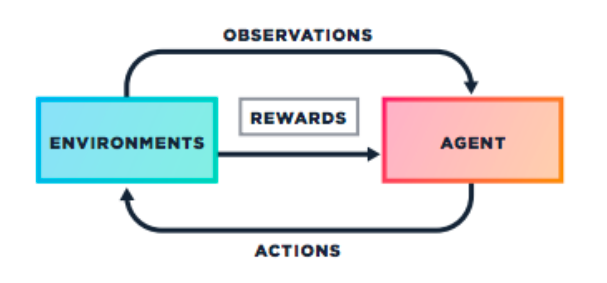

Unfortunately Reinforcement Learning RL has the high barrier in learning the concepts and the lingos. 

### Q-Learning

Q-learning learns the action-value function Q(s, a): how good to take an action at a particular state. For example, for the board position below, how good to move the pawn two steps forward. Literally, we assign a scalar value over the benefit of making such a move.
Q is called the action-value function.
In Q-learning, we build a memory table Q[s, a] to store Q-values for all possible combinations of s and a. 
Technical speaking, we sample an action from the current state. We find out the reward R (if any) and the new state s’ (the new board position). From the memory table, we determine the next action a’ to take which has the maximum Q(s’, a’).


##### Reason for switching to DQN
However, if the combinations of states and actions are too large, the memory and the computation requirement for Q will be too high. To address that, we switch to a deep Q network (DQN) to approximate Q(s, a). This is called Deep Q-learning. With the new approach, we generalize the approximation of the Q-value function rather than remembering the solutions.


### Deep Reinforcement Learning

Deep reinforcement learning is the combination of reinforcement learning (RL) and deep learning. This field of research has been able to solve a wide range of complex decision-making tasks that were previously out of reach for a machine.

![RL2.jpeg](attachment:https://github.com/vanditkaria/Reinforcement-Learning/blob/master/Navigate-Banana/RL2.jpeg)

Neural networks are the agent that learns to map state-action pairs to rewards. Like all neural networks, they use coefficients to approximate the function relating inputs to outputs, and their learning consists to finding the right coefficients, or weights, by iteratively adjusting those weights along gradients that promise less error.


At the beginning of reinforcement learning, the neural network coefficients may be initialized stochastically, or randomly. Using feedback from the environment, the neural net can use the difference between its expected reward and the ground-truth reward to adjust its weights and improve its interpretation of state-action pairs.

###### DQN:

We combine Q Learning and Deep Learning, which yields Deep Q Networks. The idea is simple: we’ll replace the the Q Learning’s table with a neural network that tries to approximate Q Values. It is usually referred to as the approximator or the approximating function, and denoted as Q(s,a; θ), where θ represents the trainable weights of the network. The learning rate is no longer needed, as our back-propagating optimizer will already have that. 
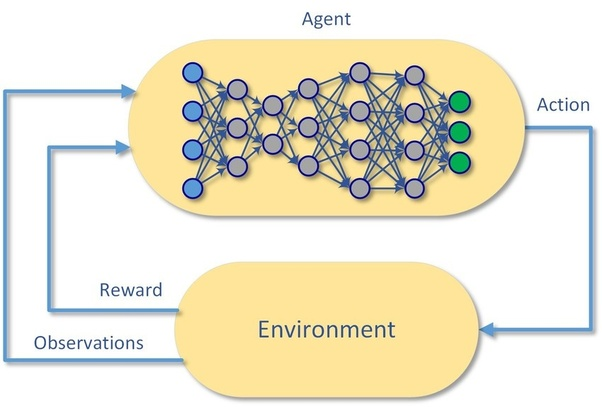

The highest level description of reinforcement learning is the maximization of some notion of long term return by acting in an environment. There are two fundamental difficulties one encounters while solving RL problems: the balance of exploration vs. exploitation and long term credit assignment.

### Algorithm:


The projects model, agent and navigation file.
1. Model.py has the neural network used to predict the q value. The architecture used in neural network has three layers comprised of 256, 128, 64 neurons. Input has a vector of 37 dimensions and output's q value.
q value is been calculated by the formula :: q(s,a) = v(s) + A(s,a).


2. Agent.py has reply buffer and agent that learns to solve the network. Replay buffer contains functionto add recent experince(state,action,reward,next state and done). Act function predicts action given state using e-epsilon greedy function. Update function is used to change the weight of target network with some part of local network(fixed target network)step function Environment given we have enough samples to train network and uses adam optimizer to optimize the neural network with learning rate set as 5e-4.During training we take batch of 64 sample of experience and train double dqn.


3. Navigation.ipynb: In this we import libraries, setup the environment and initialize the agent. DQN functions solves the environment by training the agent and it taakes in max number of episode. Epsilon-greedy algortihm is used and number of step in each eposide and variable is required to decay. In every few steps in env we train our network. The weights are stored in checkpoint.pth once it hits the value grater than a average score for hundered eposide.  

Agent took around 500 steps to reach the threashold of 13.0. which takes around 1000 steps.Below is the plot of the score vs episode

![model.png](attachment:https://github.com/vanditkaria/Reinforcement-Learning/blob/master/Navigate-Banana/model.png)



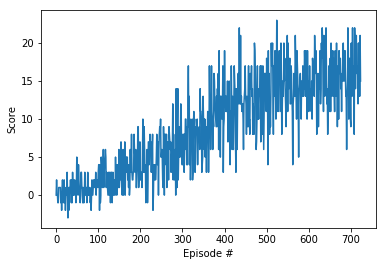

Performence can be further enhanced by using prioritized replay buffer. In replay buffer, the samples that are been taken with respect to error since the sampling in not randomised perhaps the weights need to prioritise during training. On the other hand multiple state in temporal domain can be used instead of single state which indead helps the agents to interpret the movements. On addition model based reinforcement learing can also be used to solve the environment